In [1]:
import os 
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))
from gitstats import NWBGitInfo

In [2]:
from github import Github, Label
import pandas as pd
from tqdm.notebook import tqdm
from datetime import datetime
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Configure inputs

In [3]:
DEV_USERNAMES = NWBGitInfo.CORE_DEVELOPERS # issues raised by core devs are excluded from analysis
REPOS = NWBGitInfo.CORE_API_REPOS # which repos to use. Set to NWBGitInfo.CORE_API_REPOS to use only main API NWB repos. Set to NWBGitInfo.GIT_REPOS to use all main NWB 2 repos
START = NWBGitInfo.NWB1_DEPRECATION_DATE  # Set datetime to filter issues older than START. E.g., set to  datetime(2021, 5, 1)

We need an API key from GitHub to access the API. See https://docs.github.com/en/github/authenticating-to-github/keeping-your-account-and-data-secure/creating-a-personal-access-token how to generate an access token.

**WARNING:** Never check in a token to the repo
**WARNING:** Only use tokens with read only access (never write access) to avoid accidental changes to the repo

In [4]:
with open('ghk.txt', 'r') as f:
    API_KEY = f.read().rstrip("\n")
g = Github(API_KEY)

# Retrieve all issues

# Compile dataframe for issues

In [5]:
issues_dfs = {repo: repo.get_issues_as_dataframe(date_threshold=START, github_obj=g, tqdm=tqdm)
              for repo in tqdm(REPOS.values(), position=0, desc='repos')}

repos:   0%|          | 0/4 [00:00<?, ?it/s]

pynwb issues:   0%|          | 0/215 [00:00<?, ?it/s]

hdmf issues:   0%|          | 0/119 [00:00<?, ?it/s]

matnwb issues:   0%|          | 0/55 [00:00<?, ?it/s]

nwb-schema issues:   0%|          | 0/86 [00:00<?, ?it/s]

In [6]:
# save the results to file
for repo, issues in issues_dfs.items():
    issues.to_csv("issue_responses_%s.csv" % repo.repo)

## Median Response time analysis

In [7]:
for repo, idf in issues_dfs.items():
    # Exclude enhancements and help wanted issues. Also exclude issues by core developers and issues that were orignially created after START
    query = ~idf.is_enhancement & ~idf.is_help_wanted & ~idf.user_login.isin(DEV_USERNAMES) & (idf.created_at >= START)
    res = idf[query]
    print(repo)
    display(res)
    if len(res) > 0:
        try:
            res.hist(column='time_to_response')
            plt.show()
        except:
            pass

GitRepo(owner='NeurodataWithoutBorders', repo='pynwb', mainbranch='dev')


,id,number,user,created_at,closed_at,state,title,milestone,labels,pull_request,closed_by,assignees,url,user_login,response_time,time_to_response,time_to_response_f,is_enhancement,is_help_wanted
2,1132935207,1430,"NamedUser(login=""jsiegle"")",2022-02-11 18:14:22,None,open,Slow loading of time intervals,None,"[Label(name=""category: enhancement""), Label(na...",None,None,"[NamedUser(login=""oruebel"")]",https://api.github.com/repos/NeurodataWithoutB...,jsiegle,2022-02-11 23:50:38,0 days 05:36:16,0.233519,False,False
6,1119036226,1425,"NamedUser(login=""TheChymera"")",2022-01-31 06:44:32,None,open,6 tests fail with `FileNotFoundError` on `2.0....,None,"[Label(name=""category: bug"")]",None,None,[],https://api.github.com/repos/NeurodataWithoutB...,TheChymera,2022-01-31 16:54:41,0 days 10:10:09,0.423715,False,False
7,1109744861,1424,"NamedUser(login=""CodyCBakerPhD"")",2022-01-20 20:38:48,None,open,Allow TimeSeries to have offset attribute,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,CodyCBakerPhD,2022-01-20 22:01:18,0 days 01:22:30,0.057292,False,False
9,1098240626,1422,"NamedUser(login=""CodyCBakerPhD"")",2022-01-10 18:33:05,None,open,Add conversion factor to waveform columns,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,CodyCBakerPhD,NaT,NaT,NaN,False,False
11,1088152039,1420,"NamedUser(login=""Ahad-Allen"")",2021-12-24 05:05:14,None,open,Error when adding a list of lists to the trial...,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,Ahad-Allen,2021-12-24 13:53:49,0 days 08:48:35,0.367072,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,273245915,250,"NamedUser(login=""jcfr"")",2017-11-12 16:51:54,None,open,ci: Upstream customization of python-versioneer,"Milestone(title=""NWB 2.x"", number=2)",[],None,None,"[NamedUser(login=""dorukozturk"")]",https://api.github.com/repos/NeurodataWithoutB...,jcfr,NaT,NaT,NaN,False,False
203,271322065,194,"NamedUser(login=""lfrank"")",2017-11-05 22:49:48,None,open,Additional flexibility within electrode_table,"Milestone(title=""NWB 2.x"", number=2)","[Label(name=""category: enhancement""), Label(na...",None,None,[],https://api.github.com/repos/NeurodataWithoutB...,lfrank,2017-11-06 00:53:47,0 days 02:03:59,0.086100,False,False
204,271002515,191,"NamedUser(login=""dorukozturk"")",2017-11-03 14:45:00,None,open,Some functions have high cyclomatic complexity,"Milestone(title=""NWB 2.x"", number=2)","[Label(name=""category: enhancement"")]",None,None,"[NamedUser(login=""dorukozturk"")]",https://api.github.com/repos/NeurodataWithoutB...,dorukozturk,2018-11-08 00:09:04,369 days 09:24:04,369.391713,False,False
205,258047947,113,"NamedUser(login=""neuromusic"")",2017-09-15 13:53:59,None,open,[documentation] candidate processing suite exa...,"Milestone(title=""Future"", number=3)",[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,neuromusic,2017-09-15 16:22:24,0 days 02:28:25,0.103067,False,False


GitRepo(owner='hdmf-dev', repo='hdmf', mainbranch='dev')


,id,number,user,created_at,closed_at,state,title,milestone,labels,pull_request,closed_by,assignees,url,user_login,response_time,time_to_response,time_to_response_f,is_enhancement,is_help_wanted
2,1122821929,695,"NamedUser(login=""dependabot[bot]"")",2022-02-03 09:04:43,None,open,Bump numpy from 1.16 to 1.21.0,None,"[Label(name=""dependencies"")]",<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,dependabot[bot],NaT,NaT,NaN,False,False
6,1093780579,688,"NamedUser(login=""CodyCBakerPhD"")",2022-01-04 21:48:18,None,open,Adding MeasurementData Class,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,CodyCBakerPhD,NaT,NaT,NaN,False,False
24,923585191,632,"NamedUser(login=""dsleiter"")",2021-06-17 07:42:54,None,open,Support validation of dataset references,None,"[Label(name=""category: enhancement"")]",None,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,dsleiter,2021-06-17 08:13:38,0 days 00:30:44,0.021343,False,False
27,910247328,624,"NamedUser(login=""dsleiter"")",2021-06-03 08:23:20,None,open,Create validation warnings on extra fields,None,"[Label(name=""category: enhancement"")]",None,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,dsleiter,NaT,NaT,NaN,False,False
30,891093670,610,"NamedUser(login=""dsleiter"")",2021-05-13 14:33:08,None,open,Make validation errors immutable,None,"[Label(name=""category: enhancement"")]",None,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,dsleiter,NaT,NaT,NaN,False,False
44,833353568,540,"NamedUser(login=""akshay-jaggi"")",2021-03-17 02:57:37,None,open,Unclear Error for None in List,None,"[Label(name=""category: enhancement"")]",None,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,akshay-jaggi,2021-03-17 05:31:25,0 days 02:33:48,0.106806,False,False
46,818426841,531,"NamedUser(login=""dsleiter"")",2021-03-01 03:39:00,None,open,Disallow or explicitly allow spec quantity to ...,None,"[Label(name=""category: enhancement"")]",None,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,dsleiter,NaT,NaT,NaN,False,False
47,818419718,530,"NamedUser(login=""dsleiter"")",2021-03-01 03:20:02,None,open,Matching of GroupSpec children against builder...,None,"[Label(name=""category: bug"")]",None,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,dsleiter,NaT,NaT,NaN,False,False
48,818413687,529,"NamedUser(login=""dsleiter"")",2021-03-01 03:05:27,None,open,Difference in validation errors depending on o...,None,"[Label(name=""category: bug"")]",None,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,dsleiter,NaT,NaT,NaN,False,False
49,818409259,528,"NamedUser(login=""dsleiter"")",2021-03-01 02:54:33,None,open,Resolve inconsistency between the name paramet...,None,"[Label(name=""category: enhancement"")]",None,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,dsleiter,NaT,NaT,NaN,False,False


GitRepo(owner='NeurodataWithoutBorders', repo='matnwb', mainbranch='master')


,id,number,user,created_at,closed_at,state,title,milestone,labels,pull_request,closed_by,assignees,url,user_login,response_time,time_to_response,time_to_response_f,is_enhancement,is_help_wanted
0,1143388852,412,"NamedUser(login=""lawrence-mbf"")",2022-02-18 16:47:02,None,open,Cache File and Dataset IDs for DataStubs,None,[],None,None,"[NamedUser(login=""lawrence-mbf"")]",https://api.github.com/repos/NeurodataWithoutB...,lawrence-mbf,NaT,NaT,NaN,False,False
1,1143367826,409,"NamedUser(login=""lawrence-mbf"")",2022-02-18 16:33:48,None,open,Support Map-like `subsref` and `subsasgn` over...,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,lawrence-mbf,2022-02-18 17:34:32,0 days 01:00:44,0.042176,False,False
2,1142039362,408,"NamedUser(login=""lawrence-mbf"")",2022-02-17 23:09:41,None,open,Improve `h5info` performance,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,lawrence-mbf,NaT,NaT,NaN,False,False
4,1141825650,403,"NamedUser(login=""lawrence-mbf"")",2022-02-17 20:20:46,None,open,Support legacy namespace names,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,lawrence-mbf,2022-02-17 20:29:22,0 days 00:08:36,0.005972,False,False
5,1141625004,398,"NamedUser(login=""mpompolas"")",2022-02-17 17:16:57,None,open,Namespace label inconsistency,None,[],None,None,"[NamedUser(login=""lawrence-mbf"")]",https://api.github.com/repos/NeurodataWithoutB...,mpompolas,2022-02-17 17:48:10,0 days 00:31:13,0.021678,False,False
6,1139306284,393,"NamedUser(login=""ehennestad"")",2022-02-15 23:08:53,None,open,Tutorial typo,None,"[Label(name=""category: bug""), Label(name=""topi...",None,None,"[NamedUser(login=""lawrence-mbf"")]",https://api.github.com/repos/NeurodataWithoutB...,ehennestad,2022-02-15 23:15:06,0 days 00:06:13,0.004317,False,False
7,1058816878,351,"NamedUser(login=""cechava"")",2021-11-19 18:48:13,None,open,failing validation of matnwb-generated files w...,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,cechava,2021-11-19 20:31:31,0 days 01:43:18,0.071736,False,False
8,1051120232,340,"NamedUser(login=""emilyasterjones"")",2021-11-11 15:52:19,None,open,validation requires string array for experimen...,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,emilyasterjones,2021-11-11 16:45:37,0 days 00:53:18,0.037014,False,False
9,1039104814,336,"NamedUser(login=""cechava"")",2021-10-29 02:30:52,None,open,issue exporting NWB file after it has already ...,None,[],None,"NamedUser(login=""cechava"")",[],https://api.github.com/repos/NeurodataWithoutB...,cechava,2021-10-29 17:53:20,0 days 15:22:28,0.640602,False,False
11,1025565171,319,"NamedUser(login=""lawrence-mbf"")",2021-10-13 18:26:11,None,open,Use MATLAB string type in the backend,None,"[Label(name=""category: proposal"")]",None,None,"[NamedUser(login=""lawrence-mbf"")]",https://api.github.com/repos/NeurodataWithoutB...,lawrence-mbf,NaT,NaT,NaN,False,False


GitRepo(owner='NeurodataWithoutBorders', repo='nwb-schema', mainbranch='dev')


,id,number,user,created_at,closed_at,state,title,milestone,labels,pull_request,closed_by,assignees,url,user_login,response_time,time_to_response,time_to_response_f,is_enhancement,is_help_wanted
1,1109754671,494,"NamedUser(login=""CodyCBakerPhD"")",2022-01-20 20:51:49,None,open,Add offset to TimeSeries,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,CodyCBakerPhD,NaT,NaT,NaN,False,False
2,1109741353,493,"NamedUser(login=""CodyCBakerPhD"")",2022-01-20 20:33:57,None,open,Integrating with MeasurementData,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,CodyCBakerPhD,NaT,NaT,NaN,False,False
4,1098246775,491,"NamedUser(login=""CodyCBakerPhD"")",2022-01-10 18:40:10,None,open,Add waveform conversion factor and offset to s...,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,CodyCBakerPhD,NaT,NaT,NaN,False,False
6,984300880,489,"NamedUser(login=""CodyCBakerPhD"")",2021-08-31 20:43:02,None,open,Waveform conversion factor for Units table column,None,"[Label(name=""priority: low""), Label(name=""cate...",None,None,[],https://api.github.com/repos/NeurodataWithoutB...,CodyCBakerPhD,2021-09-21 17:03:40,20 days 20:20:38,20.847662,False,False
11,931683770,479,"NamedUser(login=""apdavison"")",2021-06-28 15:16:07,None,open,Provide SharpElectrodeSeries,"Milestone(title=""NWB 2.5.0"", number=8)","[Label(name=""category: enhancement"")]",None,None,[],https://api.github.com/repos/NeurodataWithoutB...,apdavison,2021-06-28 16:21:36,0 days 01:05:29,0.045475,False,False
15,740921112,465,"NamedUser(login=""CodyCBakerPhD"")",2020-11-11 16:58:15,None,open,Add 'conversion_offset' option to ElectricalSe...,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,CodyCBakerPhD,2020-11-11 17:00:45,0 days 00:02:30,0.001736,False,False
24,734888994,464,"NamedUser(login=""lvsltz"")",2020-06-24 14:48:12,None,open,explicit icephys gain docs (stimulus),None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,lvsltz,2020-11-02 22:48:58,131 days 08:00:46,131.333866,False,False
28,624368311,441,"NamedUser(login=""satra"")",2020-05-25 15:33:24,None,open,add converters page to docs,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,satra,2020-06-01 18:06:42,7 days 02:33:18,7.106458,False,False
31,598216044,431,"NamedUser(login=""tbenst"")",2020-04-11 08:07:20,None,open,how to store non-TwoPhotonSeries ophys?,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,tbenst,2020-04-12 14:35:50,1 days 06:28:30,1.269792,False,False
32,597515884,427,"NamedUser(login=""yarikoptic"")",2020-04-09 19:53:31,None,open,Follow semantic version (actually which one an...,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,yarikoptic,2020-04-09 23:21:33,0 days 03:28:02,0.144468,False,False


# Unresponded issues

In [8]:
for repo, idf in issues_dfs.items():
    query = pd.isna(idf.response_time)
    res = idf[query]
    print(repo)
    display(res)

GitRepo(owner='NeurodataWithoutBorders', repo='pynwb', mainbranch='dev')


,id,number,user,created_at,closed_at,state,title,milestone,labels,pull_request,closed_by,assignees,url,user_login,response_time,time_to_response,time_to_response_f,is_enhancement,is_help_wanted
0,1143723521,1432,"NamedUser(login=""oruebel"")",2022-02-18 20:31:31,None,open,Enh/getcachednamespaces,None,"[Label(name=""category: enhancement""), Label(na...",<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,oruebel,NaT,NaT,NaN,False,False
1,1143623156,1431,"NamedUser(login=""oruebel"")",2022-02-18 19:16:18,None,open,Support validation against cached namespace vi...,None,"[Label(name=""category: enhancement""), Label(na...",None,None,"[NamedUser(login=""oruebel"")]",https://api.github.com/repos/NeurodataWithoutB...,oruebel,NaT,NaT,NaN,False,False
3,1122802522,1429,"NamedUser(login=""oruebel"")",2022-02-03 08:44:14,None,open,Update software architecure docs,None,"[Label(name=""category: proposal""), Label(name=...",None,None,[],https://api.github.com/repos/NeurodataWithoutB...,oruebel,NaT,NaT,NaN,False,False
8,1099441670,1423,"NamedUser(login=""rly"")",2022-01-11 17:30:11,None,open,Install nwbinspector,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,rly,NaT,NaT,NaN,False,False
9,1098240626,1422,"NamedUser(login=""CodyCBakerPhD"")",2022-01-10 18:33:05,None,open,Add conversion factor to waveform columns,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,CodyCBakerPhD,NaT,NaT,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,273245915,250,"NamedUser(login=""jcfr"")",2017-11-12 16:51:54,None,open,ci: Upstream customization of python-versioneer,"Milestone(title=""NWB 2.x"", number=2)",[],None,None,"[NamedUser(login=""dorukozturk"")]",https://api.github.com/repos/NeurodataWithoutB...,jcfr,NaT,NaT,NaN,False,False
206,257940991,112,"NamedUser(login=""ajtritt"")",2017-09-15 06:37:01,None,open,Create integration tests for all types,"Milestone(title=""NWB 2.x"", number=2)",[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,ajtritt,NaT,NaT,NaN,False,False
208,247853609,51,"NamedUser(login=""ajtritt"")",2017-08-03 19:55:14,None,open,Check neurodata_type_inc type when creating ne...,"Milestone(title=""NWB 2.x"", number=2)","[Label(name=""category: enhancement""), Label(na...",None,None,[],https://api.github.com/repos/NeurodataWithoutB...,ajtritt,NaT,NaT,NaN,False,False
209,247853515,38,"NamedUser(login=""ajtritt"")",2017-06-23 21:38:53,None,open,add functionality for analyzing data streams,"Milestone(title=""NWB 2.x"", number=2)","[Label(name=""category: enhancement""), Label(na...",None,None,[],https://api.github.com/repos/NeurodataWithoutB...,ajtritt,NaT,NaT,NaN,False,False


GitRepo(owner='hdmf-dev', repo='hdmf', mainbranch='dev')


,id,number,user,created_at,closed_at,state,title,milestone,labels,pull_request,closed_by,assignees,url,user_login,response_time,time_to_response,time_to_response_f,is_enhancement,is_help_wanted
0,1139661988,697,"NamedUser(login=""oruebel"")",2022-02-16 08:00:42,None,open,Enhance backend modularity,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,oruebel,NaT,NaT,NaN,False,False
1,1139631024,696,"NamedUser(login=""oruebel"")",2022-02-16 07:21:01,None,open,Zarr Backend,None,"[Label(name=""category: enhancement""), Label(na...",<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,oruebel,NaT,NaT,NaN,False,False
2,1122821929,695,"NamedUser(login=""dependabot[bot]"")",2022-02-03 09:04:43,None,open,Bump numpy from 1.16 to 1.21.0,None,"[Label(name=""dependencies"")]",<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,dependabot[bot],NaT,NaT,NaN,False,False
3,1109708703,692,"NamedUser(login=""rly"")",2022-01-20 19:56:33,None,open,Add reset_parent functionality,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,rly,NaT,NaT,NaN,False,False
4,1109685984,691,"NamedUser(login=""rly"")",2022-01-20 19:28:53,None,open,Cannot move containers or add/copy existing co...,None,[],None,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,rly,NaT,NaT,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,508764443,178,"NamedUser(login=""oruebel"")",2019-10-17 23:05:21,None,open,Allow overwrite of constructor arguments to re...,None,"[Label(name=""category: bug""), Label(name=""cate...",None,None,"[NamedUser(login=""oruebel"")]",https://api.github.com/repos/hdmf-dev/hdmf/iss...,oruebel,NaT,NaT,NaN,False,False
109,487201100,136,"NamedUser(login=""rly"")",2019-08-29 22:20:04,None,open,Refactor DataChunkIterator to not read first c...,None,"[Label(name=""category: enhancement"")]",None,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,rly,NaT,NaT,NaN,False,False
116,436861363,45,"NamedUser(login=""rly"")",2019-04-24 19:10:38,None,open,Provide more informative warnings if a link is...,None,"[Label(name=""category: enhancement"")]",None,None,[],https://api.github.com/repos/hdmf-dev/hdmf/iss...,rly,NaT,NaT,NaN,False,False
117,418371594,6,"NamedUser(login=""ajtritt"")",2019-03-07 15:32:02,None,open,Export extension specification YAML from struc...,None,"[Label(name=""category: enhancement"")]",None,None,"[NamedUser(login=""ajtritt"")]",https://api.github.com/repos/hdmf-dev/hdmf/iss...,ajtritt,NaT,NaT,NaN,False,False


GitRepo(owner='NeurodataWithoutBorders', repo='matnwb', mainbranch='master')


,id,number,user,created_at,closed_at,state,title,milestone,labels,pull_request,closed_by,assignees,url,user_login,response_time,time_to_response,time_to_response_f,is_enhancement,is_help_wanted
0,1143388852,412,"NamedUser(login=""lawrence-mbf"")",2022-02-18 16:47:02,None,open,Cache File and Dataset IDs for DataStubs,None,[],None,None,"[NamedUser(login=""lawrence-mbf"")]",https://api.github.com/repos/NeurodataWithoutB...,lawrence-mbf,NaT,NaT,NaN,False,False
2,1142039362,408,"NamedUser(login=""lawrence-mbf"")",2022-02-17 23:09:41,None,open,Improve `h5info` performance,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,lawrence-mbf,NaT,NaT,NaN,False,False
3,1141958933,405,"NamedUser(login=""bendichter"")",2022-02-17 22:05:48,None,open,tutorial for reading data with dynamically loa...,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,bendichter,NaT,NaT,NaN,False,False
10,1030683568,329,"NamedUser(login=""bendichter"")",2021-10-19 19:48:51,None,open,attempt to fix dims,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,bendichter,NaT,NaT,NaN,False,False
11,1025565171,319,"NamedUser(login=""lawrence-mbf"")",2021-10-13 18:26:11,None,open,Use MATLAB string type in the backend,None,"[Label(name=""category: proposal"")]",None,None,"[NamedUser(login=""lawrence-mbf"")]",https://api.github.com/repos/NeurodataWithoutB...,lawrence-mbf,NaT,NaT,NaN,False,False
14,1011016973,311,"NamedUser(login=""bendichter"")",2021-09-29 14:12:39,None,open,remove positive number validation for getRow ind.,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,bendichter,NaT,NaT,NaN,False,False
15,995982007,307,"NamedUser(login=""bendichter"")",2021-09-14 12:51:51,None,open,change tutorials to use `addRow`,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,bendichter,NaT,NaT,NaN,False,False
16,995055489,306,"NamedUser(login=""bendichter"")",2021-09-13 15:52:55,None,open,ecephys currently requires stats toolbox for r...,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,bendichter,NaT,NaT,NaN,False,False
29,674617198,234,"NamedUser(login=""bendichter"")",2020-08-06 21:40:25,None,open,do not write empty groups,None,"[Label(name=""category: enhancement"")]",None,None,"[NamedUser(login=""lawrence-mbf"")]",https://api.github.com/repos/NeurodataWithoutB...,bendichter,NaT,NaT,NaN,False,False
30,652374929,233,"NamedUser(login=""lawrence-mbf"")",2020-07-07 14:33:53,None,open,`namespace` searching hierarchy,None,[],None,None,"[NamedUser(login=""lawrence-mbf"")]",https://api.github.com/repos/NeurodataWithoutB...,lawrence-mbf,NaT,NaT,NaN,False,False


GitRepo(owner='NeurodataWithoutBorders', repo='nwb-schema', mainbranch='dev')


,id,number,user,created_at,closed_at,state,title,milestone,labels,pull_request,closed_by,assignees,url,user_login,response_time,time_to_response,time_to_response_f,is_enhancement,is_help_wanted
0,1143821297,496,"NamedUser(login=""rly"")",2022-02-18 21:52:00,None,open,Update PR template with more explicit instruct...,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,rly,NaT,NaT,NaN,False,False
1,1109754671,494,"NamedUser(login=""CodyCBakerPhD"")",2022-01-20 20:51:49,None,open,Add offset to TimeSeries,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,CodyCBakerPhD,NaT,NaT,NaN,False,False
2,1109741353,493,"NamedUser(login=""CodyCBakerPhD"")",2022-01-20 20:33:57,None,open,Integrating with MeasurementData,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,CodyCBakerPhD,NaT,NaT,NaN,False,False
3,1100709448,492,"NamedUser(login=""rly"")",2022-01-12 19:24:52,None,open,"Add optional Subject attribute ""lifestage"" for...",None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,rly,NaT,NaT,NaN,False,False
4,1098246775,491,"NamedUser(login=""CodyCBakerPhD"")",2022-01-10 18:40:10,None,open,Add waveform conversion factor and offset to s...,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,CodyCBakerPhD,NaT,NaT,NaN,False,False
5,1001154676,490,"NamedUser(login=""mavaylon1"")",2021-09-20 16:19:13,None,open,External Resources yaml,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,mavaylon1,NaT,NaT,NaN,False,False
13,796506536,469,"NamedUser(login=""rly"")",2021-01-29 01:41:15,None,open,Explicitly disallow cycles in file hierarchy,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,rly,NaT,NaT,NaN,False,False
21,673902379,458,"NamedUser(login=""rly"")",2020-08-05 23:04:03,None,open,`IndexSeries` should have the unit 'N/A' and h...,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,rly,NaT,NaT,NaN,False,False
23,658579432,455,"NamedUser(login=""rly"")",2020-07-16 21:18:42,None,open,Allow `Device` types to link to one another,None,[],None,None,[],https://api.github.com/repos/NeurodataWithoutB...,rly,NaT,NaT,NaN,False,False
25,630403835,449,"NamedUser(login=""rly"")",2020-06-03 23:44:51,None,open,[WIP] Add compatibility statement,None,[],<github.IssuePullRequest.IssuePullRequest obje...,None,[],https://api.github.com/repos/NeurodataWithoutB...,rly,NaT,NaT,NaN,False,False


# Issues by label

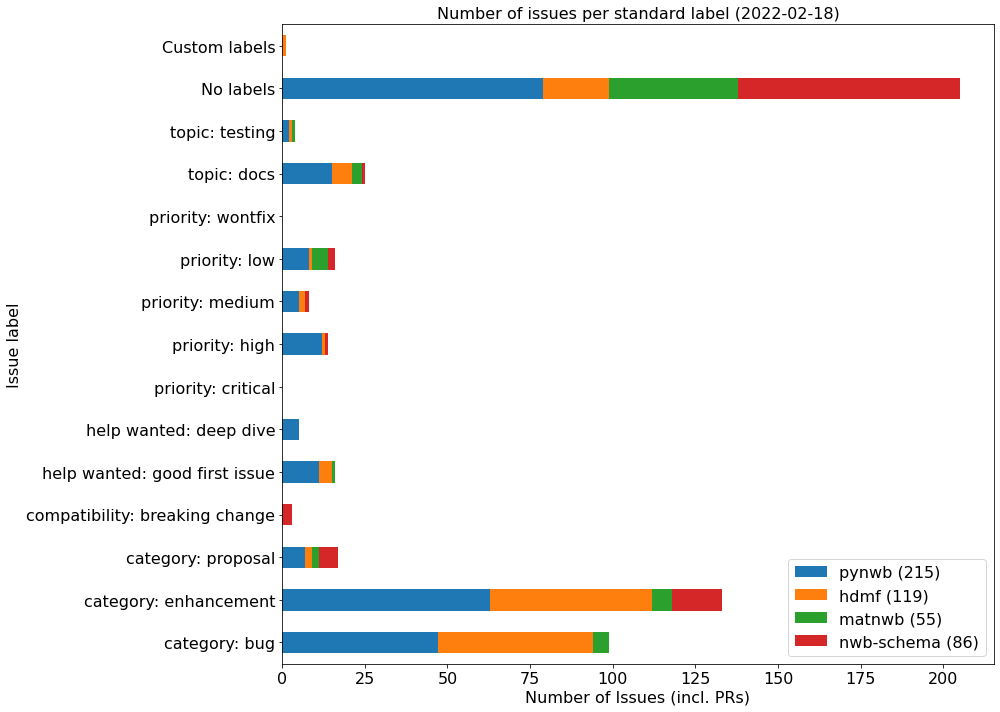

In [9]:
fontsize = 16
save_figs = True
curr_date = datetime.now().strftime("%Y-%m-%d")
output_dir = os.getcwd()
num_issues = {standard_label.label: [] for standard_label in NWBGitInfo.STANDARD_ISSUE_LABELS.values()}
num_issues['No labels'] = []
num_issues['Custom labels'] = []
for repo, idf in issues_dfs.items():
    # Compute counts for standard issues
    for standard_label in NWBGitInfo.STANDARD_ISSUE_LABELS.values():
        # Compute a binary vector indicating which issues have the given label 
        rows = idf.labels.apply(lambda x: standard_label.label in [l.name for l in x])
        num_issues[standard_label.label].append(np.sum(rows))
    # Compute count of issues with no label
    rows = idf.labels.apply(lambda x: len(x) == 0)
    num_issues['No labels'].append(np.sum(rows))
    # Compute count of issues with non-standard labels
   
    def contains_nonstandard_label(labels):
        standard_labels = [standard_label.label for standard_label in NWBGitInfo.STANDARD_ISSUE_LABELS.values()] + ['help wanted: good first issue']
        for label in labels:
            if label.name not in standard_labels and not label.name.startswith('topic: '):
                return True
        return False
    rows = idf.labels.apply(contains_nonstandard_label)
    num_issues['Custom labels'].append(np.sum(rows))
num_issues_df = pd.DataFrame.from_dict(num_issues)
num_issues_df.index = ["%s (%i)" % (repo.repo, len(idf)) for repo, idf in issues_dfs.items()]
num_issues_df.transpose().plot.barh(stacked=True, figsize=(14,10), fontsize=fontsize, rot=0)
plt.xlabel("Number of Issues (incl. PRs)", fontsize=fontsize)
plt.ylabel("Issue label", fontsize=fontsize)
plt.legend(fontsize=fontsize, loc='lower right')
plt.title("Number of issues per standard label (%s)" % curr_date, fontsize=fontsize)
plt.tight_layout()
if save_figs:
    plt.savefig(os.path.join(output_dir, 'nwb_issues_by_label_%s.pdf' % curr_date))
    plt.savefig(os.path.join(output_dir, 'nwb_issues_by_label_%s.png' % curr_date))
plt.show()